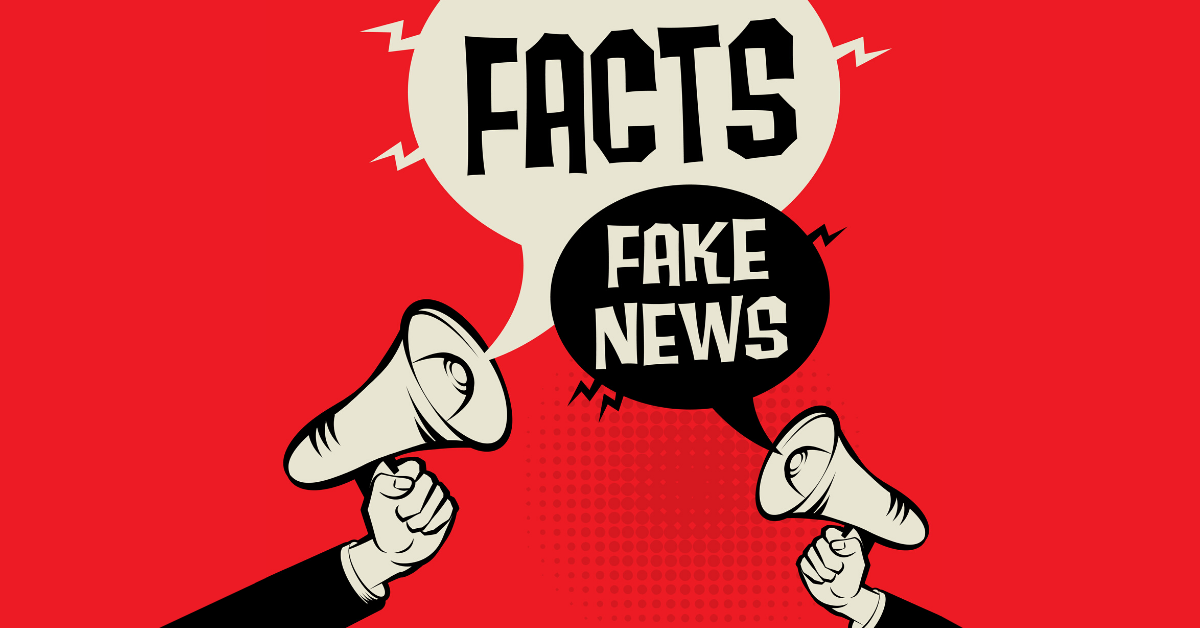

In the current world, a single rumour or fake news can spread like wildfire. Even though this many news channels and private broadcasters continue to create their own news for viewership.

It is very important to know which news to believe in and which to not. This notebook does exactly that using the dataset with fake and true news I was able to train a model with an accuracy of 99%.

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [ ]:
#reading the files
tn = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/True.csv")
fn = pd.read_csv("/kaggle/input/fake-and-real-news-dataset/Fake.csv")

In [ ]:
tn.head()

In [ ]:
fn.head()

In [ ]:
#creating a column for true and false
tn['Verdict'] = 1
fn['Verdict'] = 0

In [ ]:
#create a single dataset with 10000 rows of each which should be sufficient to make a good classifier.
df = pd.concat([tn.head(5000),fn.head(5000)], ignore_index = True)

In [ ]:
#check the number of rows
len(df)

In [ ]:
#creating a single column with text
df['Review'] = df['title'] + " " + df['text'] + " " + df['subject']

In [ ]:
df.head()

In [ ]:
#import the required packages
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [ ]:
ps = PorterStemmer()

In [ ]:
#create a list to store all the lines 
corpus = []

Now to run the most important part of Natural Language Processing,

The sentences are taken and converted into a form that the system can easily understand and run classification on. This is done by using the natural language toolkit and the count vectorizer feature from sckit.

In [ ]:
for i in range (0,10000):
    line = re.sub('[^a-zA-Z]', " ", df['Review'][i])
    line = line.lower()
    line = line.split()
    line = [ps.stem(word) for word in line if not word in set(stopwords.words('english'))]
    line = " ".join(line)
    corpus.append(line)

Create the sparse matrix using Count Vectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X = cv.fit_transform(corpus).toarray()

In [ ]:
#taking the verdict
y = df['Verdict'].values

In [ ]:
len(corpus)

In [ ]:
#split into train and test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [ ]:
#classify using Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train,y_train)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
#visualize the confusion matrix
import seaborn as sns
sns.heatmap(cm, annot = True)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

The classification model gives us an accuracy of 99.95% which is very good! 
Thus by using this method we can determine whether the news is fake or real.